In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
haberman = pd.read_csv("haberman.csv")

In [3]:
haberman.head()

,age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Information about the dataset

In [4]:
print(haberman.shape)
print(haberman.columns)

(306, 4)
Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [5]:
print(haberman.head())

   age  op_year  axil_nodes  surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1


The Haberman dataset has 306 data points (rows) and 3 feautures namely the patient's age, which year they had undergone the operation and the number of positive axillary nodes detected. The class label is the survival status of the patient, 1 stands for the patient surviving longer than 5 years and 2 stands for the patient dying within 5 years. We change the values into categorical variables, yes for survived longer than 5 years and no for those who did not.

In [6]:
print(haberman.info())
print(haberman.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
              age     op_year  axil_nodes  surv_status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000


- The average age of the patients who undergo operation is 52 years and the ages range from 30 to 83 years and 75% pf the patients lie below the age of 60. 
- The operation years start from 1958 till 1969. The axillary lymph nodes range from 0 to 52 but 75% of the values are below 4. 
- The standard deviation of age is around 10 years which is smaller than the mean, which means the data is more clustered around the mean value, operation year is around 3 and axillary nodes around 7, which is more than the mean indicating the data is more spread out.

In [7]:
haberman['surv_status'] = haberman['surv_status'].map({1:"yes", 2:"no"})

In [8]:
haberman["surv_status"].value_counts()

yes    225
no      81
Name: surv_status, dtype: int64

We can observe that the dataset is not balanced as there are only 81 patients who died within 5 years in comparison to 225 patients who survived longer than 5 years.

Our main objective is to classify whether a patient survives longer than 5 years or not and analyze which feautures are important to determine the patient's survival using Exploratory Data Analysis technniques on the variables and observing the patterns displayed by the visualizations.

# Univariate analysis

# Histograms

C:\Users\Asus PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


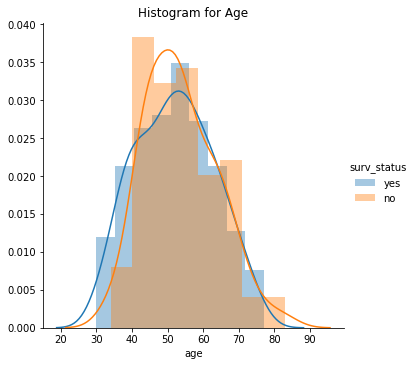

In [9]:
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram for Age')
plt.show();

There is a huge overlap in the survival statuses, but there are more number of people who did not survive between the ages 40-60, and there is slightly more chances of survival if person is younger.

C:\Users\Asus PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


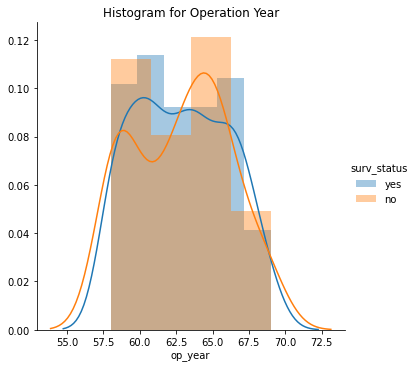

In [10]:
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.title('Histogram for Operation Year')
plt.show();

There is considerable overlap here as well, however a large number of people seemed to die around 1965 but slightly more number of people survived after the operation year of 1965.

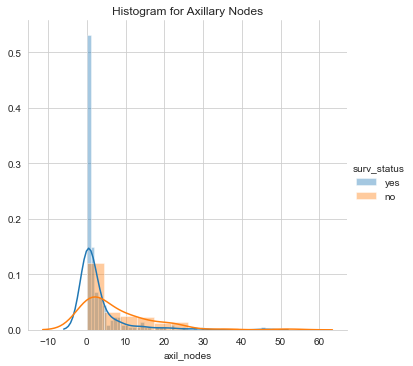

In [18]:
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title('Histogram for Axillary Nodes')
plt.show();

More people survived with lesser lymph nodes, and number of people who did not survive slightly increased with increase in lymph nodes.

In [38]:
survived_yes = haberman.loc[haberman["surv_status"] == "yes"];
survived_no = haberman.loc[haberman["surv_status"] == "no"];


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


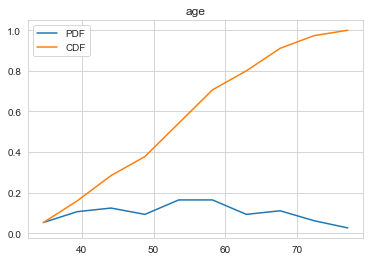

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


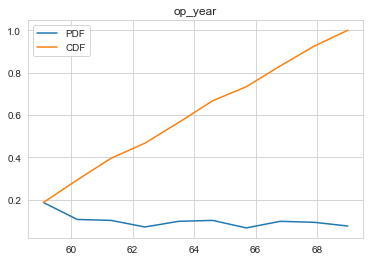

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


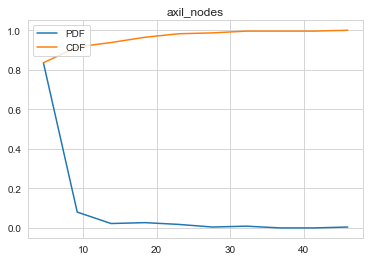

In [42]:
for i, feature in enumerate(list(haberman)[:-1]):
    counts, bin_edges = np.histogram(survived_yes[feature], bins=10, density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, label = "PDF")
    plt.plot(bin_edges[1:], cdf, label = "CDF")
    plt.legend(loc = "upper left")
    plt.title(feature)
    
    plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


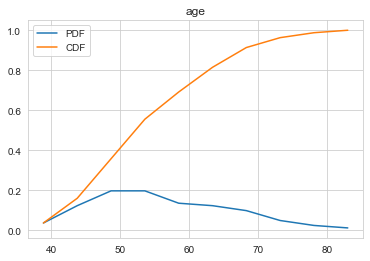

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


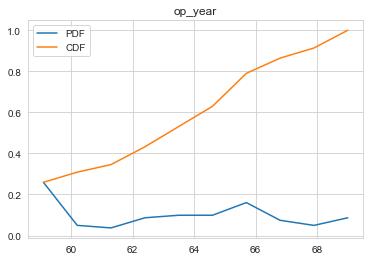

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


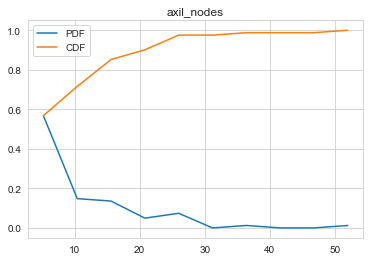

In [44]:
for i, feature in enumerate(list(haberman)[:-1]):
    counts, bin_edges = np.histogram(survived_no[feature], bins=10, density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, label = "PDF")
    plt.plot(bin_edges[1:], cdf, label = "CDF")
    plt.legend(loc = "upper left")
    plt.title(feature)

    plt.show()

- People tend to have higher chances of survival when they are younger.
- There seemed to be a sudden rise of non survivors around 1965, before decreasing.
- The lesser the number of lymph nodes, the higher the chances of survival.

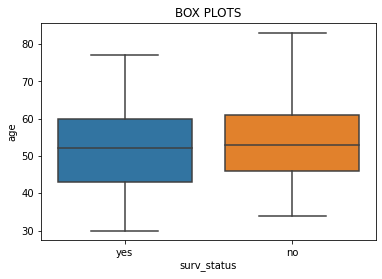

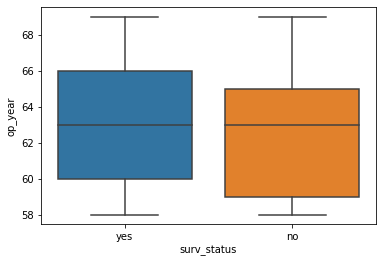

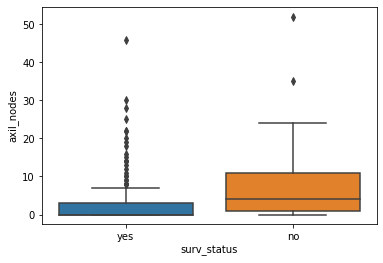

In [12]:

plt.title('BOX PLOTS')

sns.boxplot(x='surv_status',y='age', data=haberman)
plt.show()
sns.boxplot(x='surv_status',y='op_year', data=haberman)
plt.show()
sns.boxplot(x='surv_status',y='axil_nodes', data=haberman)
plt.show()

- The quantiles for age are slightly higher for 'no' than yes, which further shows age has a slight impact and that younger people have slightly greater chances of survival.
- Overall more people survived during the later years of operation, although a considerable number did not survive in the 3rd quantile.
- Lesser the lymph nodes, chances of survival are considerably higher as the number of survivors are highly dense before the 2nd quantile.


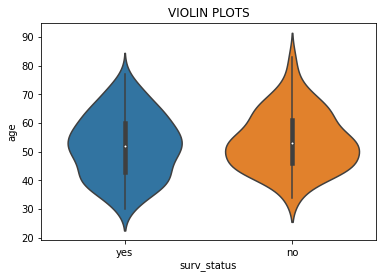

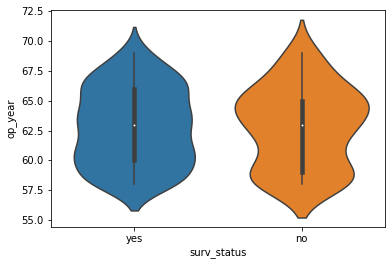

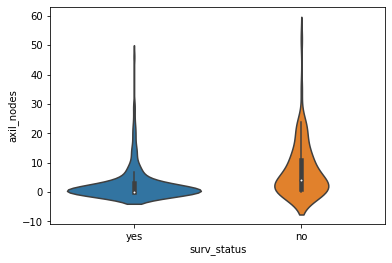

In [13]:
plt.title('VIOLIN PLOTS')

for i, feature in enumerate(list(haberman)[:-1]):
    sns.violinplot(x='surv_status',y= feature, data=haberman, size = 6)
    plt.show()

Conclusions:
- Patients who are younger have a slightly greater chances of survival after 5 years of operation. The highest number of survivors lie between ages 50 and 60.
- Patients who were operated after the year 1965 have slightly higher chances of survival in comparison to patients who were operated on 1959 or earlier. However around the year 1965, the number of non- survivors increased a lot before decreasing again.
- The axillary nodes are highly dense between 0 to 5. About 80% of the patients who survived after 5 years have lower than 5 axillary nodes than patients who did not survive, they had comparatively higher axillary nodes. Among the patients that did not survive, a considerable number of patients had lymph nodes between 10 and 20, in comparison to the survivors.

From the above, we can conclude that of the three features, the number of axillary nodes is an important feauture to determine whether a patient survives longer than 5 years or not.

# 2-D Scatter Plot

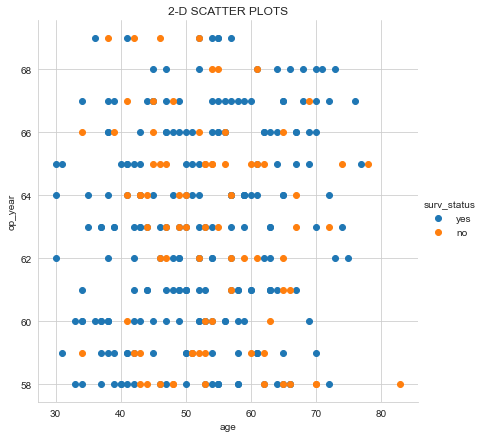

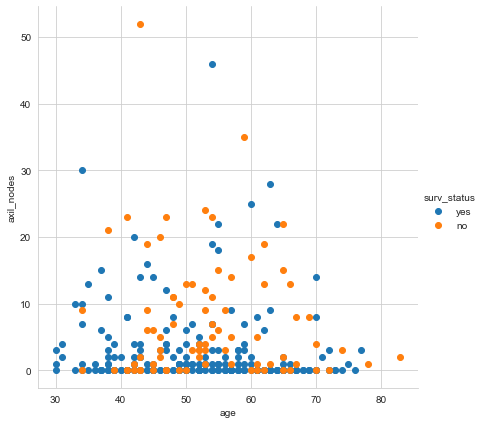

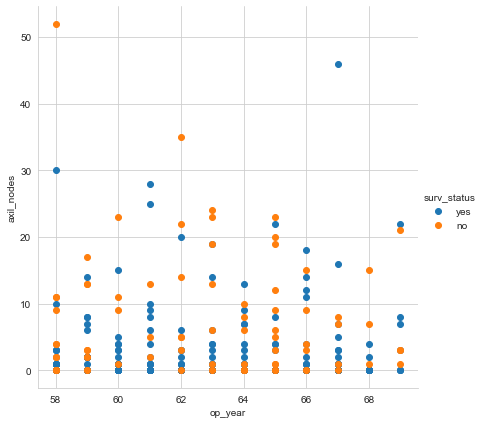

In [17]:

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(plt.scatter, "age", "op_year") \
   .add_legend();
plt.title('2-D SCATTER PLOTS')

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(plt.scatter, "op_year", "axil_nodes") \
   .add_legend();

plt.show();

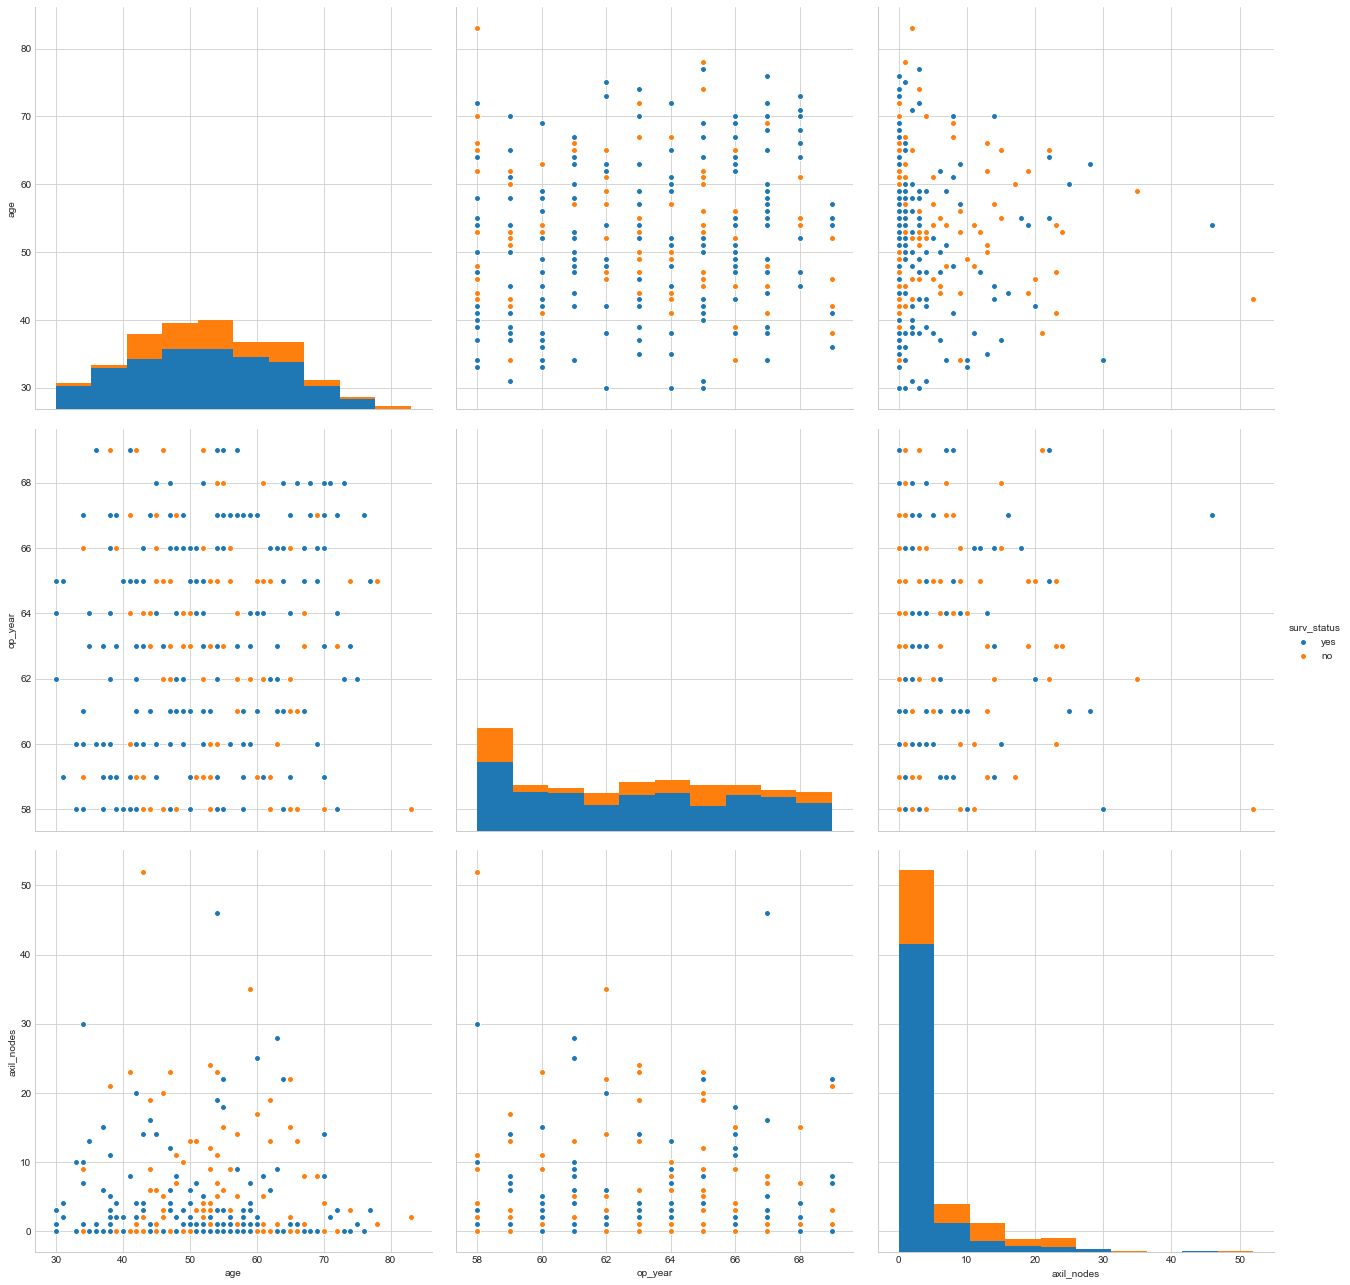

In [31]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status", size=6);
plt.title('2-D SCATTER PLOTS')

plt.show()

Conclusion:
- None of the plots are properly linearly separable or distinguishable in a manner that firm conclusions can be drawn and the points overlap a lot however between age and axillary nodes, however we can say that the older a person is and the more positive nodes they have, the lesser the chances of survival after operation.

## Density/ Contour plot

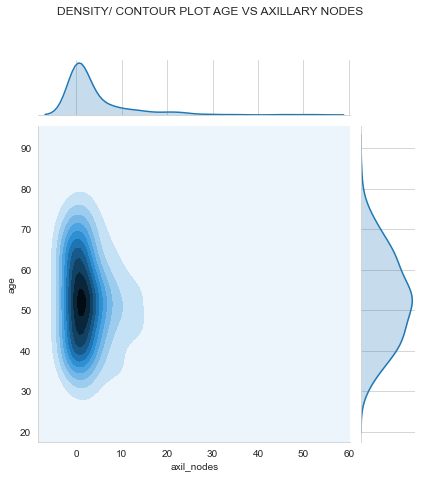

In [34]:
sns.jointplot(x="axil_nodes", y="age", data= haberman, kind="kde");
plt.suptitle('DENSITY/ CONTOUR PLOT AGE VS AXILLARY NODES', y = 1.1)

plt.show();

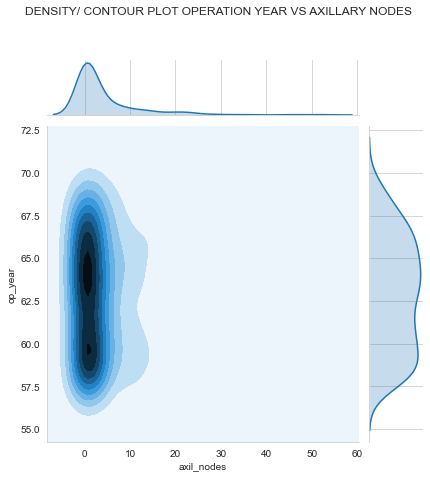

In [35]:
sns.jointplot(x="axil_nodes", y="op_year", data= haberman, kind="kde");
plt.suptitle('DENSITY/ CONTOUR PLOT OPERATION YEAR VS AXILLARY NODES', y = 1.1)

plt.show();

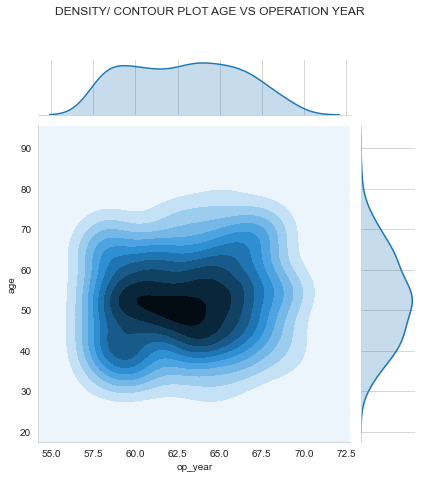

In [36]:
sns.jointplot(x="op_year", y="age", data= haberman, kind="kde");
plt.suptitle('DENSITY/ CONTOUR PLOT AGE VS OPERATION YEAR', y = 1.1)

plt.show();

Even in the above density plot, we can observe that the number of survivors are fairly greater with lesser number of axillary lymph nodes, with slightly more chances of survival if the patient is younger, which makes sense since younger people generally tend to have more robust bodies which recover at a faster rate.

## Conclusions:

The Haberman Dataset has been explored using various visualization techniques and the most important features which would help determine the survival of a person would mostly be the number of axillary lymph nodes present, followed by the age of the person. 